In [1]:
## This file is used to test the learnt RL control policy for one episode.

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
import os
import pickle

import gym
import opf_envs

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ray
from ray.rllib.agents.registry import get_agent_class
from ray.tune.registry import register_env
from ray.rllib.models import ModelCatalog

from opf_envs.envs.gym_reserve_policy import ReservePolicyEnv
from opf_envs.envs.gym_reserve_policy import ReservePolicyEnv2
from opf_envs.envs.gym_reserve_policy import ReservePolicyEnv3
from opf_envs.envs.gym_reserve_policy import ReservePolicyEnv4
from opf_envs.envs.gym_reserve_policy import ReservePolicyEnv5
from opf_envs.envs.gym_reserve_policy import ReservePolicyEnv6

from rl_controller_evaluation import ReservePolicyEnvControllerTester

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
current_file_path = os.getcwd()

REWARD_SCALING_FACTOR = 0.001

plt.rcParams["font.family"] = "Times New Roman"

In [4]:
def get_rl_controller(run_class, env, checkpoint):
    """ Load controller from checkpoint.
    """
    
    #ray.init()
    ray.init(_node_ip_address='192.168.0.10')

    # Load configuration from file
    config_dir = os.path.dirname(checkpoint)
    config_path = os.path.join(config_dir, "params.pkl")
    if not os.path.exists(config_path):
        config_path = os.path.join(config_dir, "../params.pkl")
    if not os.path.exists(config_path):
        raise ValueError(
            "Could not find params.pkl in either the checkpoint dir or "
            "its parent directory.")
    
    print("config_path:", config_path)
    
    with open(config_path, 'rb') as f:
        config = pickle.load(f)

    if "num-cpus" in config:
        config["num-cpus"] = min(1, config["num-cpus"])

    #config["seed"] = RANDOM_SEED

    cls = get_agent_class(run_class)
    agent = cls(env=env, config=config)
    agent.restore(checkpoint)

    return agent

In [5]:
if __name__ == "__main__":
    
    current_file_path = os.getcwd()
    
    run_class = 'PPO'
    env_id = 'ReservePolicy-v4'
    checkpoint = os.path.join(current_file_path,
         'results_hpc/states_including_end_horizon_reserves_updated_action_mapping4/ReservePolicyEnv-v4/PPO_ReservePolicyEnv-v4_a1a96_00000_0_2021-10-24_22-47-17/checkpoint_158/checkpoint-158')
             
    env = gym.make(env_id)  
    
    register_env(env_id, lambda config: env)
    
    rl_agent = get_rl_controller(run_class, env_id, checkpoint)
    
    config = {'env_name': env_id,
              'start_idx': None}
    controller_tester = None

    # Testing multiple scenarios with randomly generated ID.
    num_test_scenarios = 20
    scenario_ids = [np.random.randint(0, 8856) for _ in range(num_test_scenarios)]
    reward_list = []
    
    for s_id in scenario_ids:
        
        print("start_idx", s_id)

        config['start_idx'] = s_id
        
        if controller_tester is None:
            controller_tester = ReservePolicyEnvControllerTester(config)
        else:
            controller_tester.update_config_and_reset(config)

        while not controller_tester.episode_finished:
            action = rl_agent.compute_action(controller_tester.env_state)
            controller_tester.apply_control(action)
        reward_list.append(controller_tester.episode_reward)

/Users/aeseye/opt/anaconda3/envs/rl_reserve_policy/lib/python3.7/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
2021-10-25 11:46:08,718	INFO services.py:1092 -- View the Ray dashboard at http://127.0.0.1:8265
2021-10-25 11:46:11,178	INFO trainer.py:592 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-10-25 11:46:11,179	INFO trainer.py:1065 -- `_use_trajectory_view_api` only supported for PyTorch so far! Will run w/o.
2021-10-25 11:46:11,180	INFO trainer.py:619 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


config_path: /Users/aeseye/Desktop/AGM-Resilience-Project/Github/rl_mpc_reserve_policy/rl_learning/results_hpc/states_including_end_horizon_reserves_updated_action_mapping4/ReservePolicyEnv-v4/PPO_ReservePolicyEnv-v4_a1a96_00000_0_2021-10-24_22-47-17/checkpoint_158/../params.pkl


(pid=10928, ip=10.10.141.39) WARNING:tensorflow:From /Users/aeseye/opt/anaconda3/envs/rl_reserve_policy/lib/python3.7/site-packages/tensorflow_core/python/compat/v2_compat.py:68: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=10928, ip=10.10.141.39) Instructions for updating:
(pid=10928, ip=10.10.141.39) non-resource variables are not supported in the long term
(pid=10926, ip=10.10.141.39) WARNING:tensorflow:From /Users/aeseye/opt/anaconda3/envs/rl_reserve_policy/lib/python3.7/site-packages/tensorflow_core/python/compat/v2_compat.py:68: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=10926, ip=10.10.141.39) Instructions for updating:
(pid=10926, ip=10.10.141.39) non-resource variables are not supported in the long term
(pid=10931, ip=10.10.141.39) WARNING:tensorflow:From /Users/aeseye/opt/anaconda3/envs/rl_reserve_policy/

(pid=10927, ip=10.10.141.39) WARNING:tensorflow:From /Users/aeseye/opt/anaconda3/envs/rl_reserve_policy/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=10927, ip=10.10.141.39) Instructions for updating:
(pid=10927, ip=10.10.141.39) Use tf.where in 2.0, which has the same broadcast rule as np.where
(pid=10925, ip=10.10.141.39) WARNING:tensorflow:From /Users/aeseye/opt/anaconda3/envs/rl_reserve_policy/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=10925, ip=10.10.141.39) Instructions for updating:
(pid=10925, ip=10.10.141.39) Use tf.where in 2.0, which has the same broadcast rule as np.where
(pid=10929, ip=10.10.141.39) WARNING:tensorflow:From /Users/aeseye/opt/anaconda3/envs/rl_reserve_policy/lib/python3.7/site-packages/tensorfl

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2021-10-25 11:47:38,933	INFO trainable.py:255 -- Trainable.setup took 87.758 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-10-25 11:47:38,935	WARNING util.py:40 -- Install gputil for GPU system monitoring.
2021-10-25 11:47:39,349	INFO trainable.py:482 -- Restored on 192.168.0.10 from checkpoint: /Users/aeseye/Desktop/AGM-Resilience-Project/Github/rl_mpc_reserve_policy/rl_learning/results_hpc/states_including_end_horizon_reserves_updated_action_mapping4/ReservePolicyEnv-v4/PPO_ReservePolicyEnv-v4_a1a96_00000_0_2021-10-24_22-47-17/checkpoint_158/checkpoint-158
2021-10-25 11:47:39,365	INFO trainable.py:489 -- Current state after restoring: {'_iteration': 158, '_timesteps_total': None, '_time_total': 43387.32466697693, '_episodes_total': 14892}
/Users/aeseye/opt/anaconda3/envs/rl_reserve_policy/lib/python3.7/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  w

start_idx 4703

Start Index for The Renewables: 4703

Simulation Step: 0

MT Remaining Fuel: 1000
ES SOC Level: 100
MT End-of-horizon Fuel: 1000
ES End-of-horizon SOC: 100
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7566250000000002

Simulation Step: 1

MT Remaining Fuel: 988.3480195416666
ES SOC Level: 98.7158941485865
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.26305208 0.46565267]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.801044556253055

Simulation Step: 2

MT Remaining Fuel: 973.0033680103353
ES SOC Level: 97.431788297173
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Ac

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8122494603289275

Simulation Step: 19

MT Remaining Fuel: 652.520765534047
ES SOC Level: 80.5393065496637
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.29822627 0.3084856 ]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8124902398034851

Simulation Step: 20

MT Remaining Fuel: 637.5848805798645
ES SOC Level: 79.2566916418991
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.17880921 0.24955665]
Fuel Reserve Mapped: 1.3401509143683068e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.3926637620897964e-12, 0.884812164695127, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 6.892

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 3.4448861165560416, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.8798126993972772, 0.0, 0.0, 0.0]
Reward: 0.4338922858651133

Simulation Step: 37

MT Remaining Fuel: 349.03342429380535
ES SOC Level: 62.375493096647205
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [0.5761777  0.06909166]
Fuel Reserve Mapped: 8.959533012416546e-14
SOC Reserve Mapped: 19.999999999999947
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.5631940186722204e-13, 1.8068083374161716, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.7763568394002505e-13, 0.9859429726075533, 0.0, 0.0, 0.0]
Reward: 0.5966535853989945

Simulation Step: 38

MT Remaining Fuel: 336.80848189275946
ES SOC Level: 61.0913872452337
MT End-of-horizon Fuel: 1.7053025658242404e-13
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [0.9931326 0.8104019]
Fuel Reserve Mapped: 1.6994470609411894e-13


Active Shedded Loads: [0.0, 1.8474111129762605e-13, 0.0, 0.0, 1.8947220447209787, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.8916339033982936, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5249569966831471

Simulation Step: 55

MT Remaining Fuel: 150.32940112062755
ES SOC Level: 40.5456936226177
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 4.536772230211895, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.1349516377467666, 0.0, 0.0, 0.0, 0.0]
Reward: 0.20879018400164762

Simulation Step: 56

MT Remaining Fuel: 142.36252561874508
ES SOC Level: 39.2615877712042
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 6.491770949478479, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 3.05495103

Active Shedded Loads: [0.0, 0.0, 0.0, 1.2148190943436248, 10.957170841752323, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.6985209792466804, 5.156315690236379, 0.0, 0.0, 0.0, 0.0]
Reward: -0.7967141678768215

Reward is -ve
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 5.329070518200751e-15
SOC Reserve Mapped: 20.0
start_idx 3225

Start Index for The Renewables: 3225

Simulation Step: 0

MT Remaining Fuel: 1000
ES SOC Level: 100
MT End-of-horizon Fuel: 1000
ES End-of-horizon SOC: 100
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [1.0373923942097463e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6883914546698334

Simulation Step: 1

MT Remaining Fuel: 983.031126127546
ES SOC Level: 98.7158941485865
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.2706746  0.54211986]
Fuel Reserve Mapped: 0.0
SOC Reserv

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.7979114898326731, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.9810881221114371, 0.0, 0.0, 0.0]
Reward: 0.5816415160514854

Simulation Step: 18

MT Remaining Fuel: 639.8430568018285
ES SOC Level: 81.6370808678503
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [0.27364334 0.5706184 ]
Fuel Reserve Mapped: 1.4479648423738715e-13
SOC Reserve Mapped: 19.999999999999922
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.5260088150301945, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.28703359618668944, 0.0, 0.0, 0.0]
Reward: 0.708900256531464

Simulation Step: 19

MT Remaining Fuel: 626.0231744933562
ES SOC Level: 80.3529750164368
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.27843314 0.5377598 ]
Fuel Reserve Mapped: 1.453410213903862e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0,

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.792619702313784, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [1.7053025658242404e-13, 0.0, 0.0, 0.0, 0.0, 0.4325183857431888, 0.0, 0.0, 0.0]
Reward: 0.6781117533685266

Simulation Step: 36

MT Remaining Fuel: 315.4024500775215
ES SOC Level: 63.659598948060506
MT End-of-horizon Fuel: 5.684341886080802e-14
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [ 0.10549204 -0.28862277]
Fuel Reserve Mapped: 3.141997355314021e-14
SOC Reserve Mapped: 19.999999999999964
Active Shedded Loads: [0.0, 1.8474111129762605e-13, 0.0, 0.0, 0.0, 0.8182580218613069, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.44650875786174077, 0.0, 0.0, 0.0]
Reward: 0.6747137900034103

Simulation Step: 37

MT Remaining Fuel: 301.6316670567278
ES SOC Level: 62.37549309664699
MT End-of-horizon Fuel: 2.8421709430404007e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.5096394 -1.       ]
Fuel Reserve Mapped: 2.1453265935098866e-13
SOC Reserv

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.734617638880058

Simulation Step: 55

MT Remaining Fuel: 126.66285021172082
ES SOC Level: 39.2615877712039
MT End-of-horizon Fuel: 8.526512829121202e-14
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.2160337298426214, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.0428394022788616, 0.0, 0.0, 0.0, 0.0]
Reward: 0.47130068980464224

Simulation Step: 56

MT Remaining Fuel: 118.29796395187029
ES SOC Level: 37.9774819197904
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 5.926023684784212, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.7887170281339024, 0.0, 0.0, 0.0, 0.0]

Active Shedded Loads: [0.0, 0.0, 0.0, 40.306905850564846, 32.47599644990773, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 23.176470864074844, 15.282821858780114, 0.0, 0.0, 0.0, 0.0]
Reward: -8.614128355646844

Reward is -ve
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0

Simulation Step: 1

MT Remaining Fuel: 969.6526588208803
ES SOC Level: 100.0
MT End-of-horizon Fuel: 1.5916157281026244e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.19401231 -0.11753348]
Fuel Reserve Mapped: 9.50204389319918e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 1.5696003741887523, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.9025202151584608, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.3904325771970981

Simulation Step: 2

MT Remaining Fuel: 939.5152843396098
ES SOC Level: 100.0
MT End-of-horizon Fuel: 7.958078640513122e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.19582482 -0.13015673]
Fuel Reserve Mapped

Active Shedded Loads: [0.0, 0.0, 0.0, 0.16316350624128972, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.09381901608867338, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5817460058097451

Simulation Step: 19

MT Remaining Fuel: 752.8118376587232
ES SOC Level: 80.4510967138202
MT End-of-horizon Fuel: 1.4779288903810084e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.21450758 0.2720625 ]
Fuel Reserve Mapped: 8.974779198891308e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6051079810072979

Simulation Step: 20

MT Remaining Fuel: 733.9477904438276
ES SOC Level: 80.4510967138202
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.22787644 0.00536824]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 1.7053025658242404e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.601120569467336

Simulation Step: 37

MT Remaining Fuel: 619.7851651985638
ES SOC Level: 59.981617526477706
MT End-of-horizon Fuel: 6.821210263296962e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 6.821210263296962e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.601582443970225

Simulation Step: 38

MT Remaining Fuel: 593.2866701667481
ES SOC Level: 59.8947595034644
MT End-of-horizon Fuel: 4.547473508864641e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.14136478 -1.        ]
Fuel Reserve Mapped: 1.9523104514323e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Active Shedded Loads: [1.8474111129762605e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [1.7053025658242404e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5905169778964585

Simulation Step: 56

MT Remaining Fuel: 259.0019804777978
ES SOC Level: 40.5456936226172
MT End-of-horizon Fuel: 2.8421709430404007e-13
ES End-of-horizon SOC: 20.0000000000005
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 2.8421709430404007e-13
SOC Reserve Mapped: 20.0000000000005
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 1.7053025658242404e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.591107105053271

Simulation Step: 57

MT Remaining Fuel: 242.26778081683997
ES SOC Level: 39.2615877712037
MT End-of-horizon Fuel: 1.7053025658242404e-13
ES End-of-horizon SOC: 20.0000000000005
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000005
Active Shedded Loads: [0.0, 3.410605131648481e-13, 0.0, 

Active Shedded Loads: [0.0, 0.0, 0.0, 1.4351262744355608, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.8251976078013854, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.4383902274081685

Simulation Step: 2

MT Remaining Fuel: 961.6222741925603
ES SOC Level: 97.431788297173
MT End-of-horizon Fuel: 1.5916157281026244e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.23931073 0.15694106]
Fuel Reserve Mapped: 9.862532221704664e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6316673002207328

Simulation Step: 3

MT Remaining Fuel: 928.288940859227
ES SOC Level: 97.24056913829871
MT End-of-horizon Fuel: 1.2505552149377763e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.24585067 0.12942219]
Fuel Reserve Mapped: 7.790025245487807e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 1.3058918984795014, 0.0, 0.0, 0.0, 0.0, 0.0]
Reac

Active Shedded Loads: [0.0, 0.0, 0.0, 0.3135550695521374, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.18029416499256, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5717998787266327

Simulation Step: 20

MT Remaining Fuel: 592.024479286285
ES SOC Level: 77.0224624719759
MT End-of-horizon Fuel: 6.821210263296962e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.23388982 0.49681243]
Fuel Reserve Mapped: 4.2083109458128376e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 1.9889678124044394, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.1436564921325214, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.344841267118434

Simulation Step: 21

MT Remaining Fuel: 574.1698872847863
ES SOC Level: 75.7383566205624
MT End-of-horizon Fuel: 6.821210263296962e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.33243084 0.01935574]
Fuel Reserve Mapped: 4.544395458896955e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.821706806245345, 0.

Active Shedded Loads: [0.0, 0.0, 0.0, 0.15855065066469365, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.09116662413221377, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.556678925851978

Simulation Step: 38

MT Remaining Fuel: 200.2736951173367
ES SOC Level: 60.896689237923994
MT End-of-horizon Fuel: 2.842170943040401e-14
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 2.842170943040401e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.5577105713370827, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.32068357851878204, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5024947564445891

Simulation Step: 39

MT Remaining Fuel: 184.572354287437
ES SOC Level: 59.6125833865105
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.45345056  1.        ]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 2.7195889954857364, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loa

Active Shedded Loads: [0.0, 0.0, 0.0, 14.023132709103827, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 8.06330130773457, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: -1.4134958155308517

Reward is -ve
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0

Simulation Step: 56

MT Remaining Fuel: 2.014213275435863
ES SOC Level: 37.782783912481
MT End-of-horizon Fuel: 8.881784197001252e-16
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 8.881784197001252e-16
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 4.677806382472404, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 2.689738669921738, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: -0.16865266684762487

Reward is -ve
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 8.881784197001252e-16
SOC Reserve Mapped: 20.0

Simulation Step: 57

MT Remaining Fuel: 0.0
ES SOC Level: 36.4986780610675
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent C

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7077683811137199

Simulation Step: 3

MT Remaining Fuel: 941.3378719022334
ES SOC Level: 100.0
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.22493851 0.00862501]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7084714346548686

Simulation Step: 4

MT Remaining Fuel: 937.5487494475135
ES SOC Level: 98.7158941485865
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.23419641 0.04305833]
Fuel Reserve Mapped: 7.015594346643705e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.45841357368423985, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.21572403467479262, 0.0, 0.0, 0.0,

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.2394538921172753, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.1126841845257971, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6747956372693081

Simulation Step: 22

MT Remaining Fuel: 726.368731491402
ES SOC Level: 84.2052925706774
MT End-of-horizon Fuel: 5.684341886080801e-13
ES End-of-horizon SOC: 20.0000000000001
Agent Chosen Action: [0.31456396 0.15340637]
Fuel Reserve Mapped: 3.7362154894167356e-13
SOC Reserve Mapped: 20.000000000000057
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.513335377763056, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.24156958953541618, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6419703620430374

Simulation Step: 23

MT Remaining Fuel: 715.7123068653287
ES SOC Level: 82.9211867192639
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.000000000000302
Agent Chosen Action: [0.2555739  0.53914267]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.00000000000023
Active Shedded Loads: [0.0, 0.0, 0.0, 0

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 1.7408297026122455e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6857979832433744

Simulation Step: 40

MT Remaining Fuel: 510.0053487024001
ES SOC Level: 61.091387245234294
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 20.0000000000008
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000008
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.671326365706591, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.2570947603324996, 0.0, 0.0, 0.0, 0.0]
Reward: 0.3683815562594317

Simulation Step: 41

MT Remaining Fuel: 493.83028958646895
ES SOC Level: 59.8072813938208
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000009
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000009
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.7395723820589737, 0.0, 0.0, 0.0, 0.0]
Reactive Shedde

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 4.357046834636682, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.050374981005495, 0.0, 0.0, 0.0, 0.0]
Reward: 0.1538936025848084

Simulation Step: 58

MT Remaining Fuel: 199.46828866833064
ES SOC Level: 37.9774819197912
MT End-of-horizon Fuel: 8.526512829121202e-14
ES End-of-horizon SOC: 20.0000000000015
Agent Chosen Action: [0.6302884 1.       ]
Fuel Reserve Mapped: 6.950337573134518e-14
SOC Reserve Mapped: 20.0000000000015
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 5.203127753985646, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.4485307077579597, 0.0, 0.0, 0.0, 0.0]
Reward: 0.04823334412729946

Simulation Step: 59

MT Remaining Fuel: 184.12829967609997
ES SOC Level: 36.693376068377596
MT End-of-horizon Fuel: 2.5579538487363607e-13
ES End-of-horizon SOC: 20.0000000000016
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 2.5579538487363607e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0,

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.656625

Simulation Step: 3

MT Remaining Fuel: 955.0854166666666
ES SOC Level: 97.431788297173
MT End-of-horizon Fuel: 4.547473508864641e-13
ES End-of-horizon SOC: 20.1232726758114
Agent Chosen Action: [0.26940554 0.39809597]
Fuel Reserve Mapped: 2.8862940412276855e-13
SOC Reserve Mapped: 20.08617351534709
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.656625

Simulation Step: 4

MT Remaining Fuel: 950.4145833333332
ES SOC Level: 97.431788297173
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.1930124419608
Agent Chosen Action: [0.279957   0.38809374]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.13395968118963
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6897659536960188

Simulation Step: 22

MT Remaining Fuel: 792.595519062147
ES SOC Level: 84.2052925706775
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.000000000000203
Agent Chosen Action: [0.2672165  0.08154985]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.00000000000011
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6899436404829863

Simulation Step: 23

MT Remaining Fuel: 782.8583653612689
ES SOC Level: 82.921186719264
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.000000000000302
Agent Chosen Action: [0.23764008 0.01447228]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.000000000000153
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.29322440124902727, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.1379

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7194493938511468

Simulation Step: 40

MT Remaining Fuel: 465.6365524088924
ES SOC Level: 61.09138724523449
MT End-of-horizon Fuel: 1.7053025658242404e-13
ES End-of-horizon SOC: 20.000000000001002
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 1.7053025658242404e-13
SOC Reserve Mapped: 20.000000000001002
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7260783626904862

Simulation Step: 41

MT Remaining Fuel: 454.4281275016496
ES SOC Level: 59.807281393821
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000011
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000011
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Active Shedded Loads: [1.8474111129762605e-13, 0.0, 1.7763568394002505e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7788453777117004

Simulation Step: 59

MT Remaining Fuel: 277.4478017907302
ES SOC Level: 36.693376068378
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 20.0000000000019
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.5631940186722204e-13, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7808117409761566

Simulation Step: 60

MT Remaining Fuel: 260.4715681640215
ES SOC Level: 35.4092702169645
MT End-of-horizon Fuel: 1.7053025658242404e-13
ES End-of-horizon SOC: 20.0000000000019
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 1.7053025658242404e-13
SOC Reserve Mapped: 20.0000000000019
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
R

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0336902754955446, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.018384180370432546, 0.0, 0.0, 0.0]
Reward: 0.8389018626725838

Simulation Step: 6

MT Remaining Fuel: 869.5473539615652
ES SOC Level: 94.0967977512995
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.2350088  0.40244716]
Fuel Reserve Mapped: 1.4040424571137682e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.6415498064559699, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.35008224732774096, 0.0, 0.0, 0.0]
Reward: 0.7771860579729716

Simulation Step: 7

MT Remaining Fuel: 846.663762550631
ES SOC Level: 93.2402937384735
MT End-of-horizon Fuel: 1.3642420526593924e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.2429233  0.42536888]
Fuel Reserve Mapped: 8.478241200727491e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.013

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8326948150877801

Simulation Step: 25

MT Remaining Fuel: 510.26397123603317
ES SOC Level: 75.2083972191181
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.1269921  0.14097351]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.834495569628264

Simulation Step: 26

MT Remaining Fuel: 501.44845780460844
ES SOC Level: 73.96815532305881
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.22445594 0.19397429]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 2.0452531177137274, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.1160580216809635, 0.0, 0.0, 0.0]
Reward: 0.62695549

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 2.7963534663263516, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.525920039196965, 0.0, 0.0, 0.0]
Reward: 0.5332294263150587

Simulation Step: 44

MT Remaining Fuel: 286.4291795531367
ES SOC Level: 52.781476750314205
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.92551434 -0.66808176]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8158320575365366

Simulation Step: 45

MT Remaining Fuel: 272.9788261776288
ES SOC Level: 51.4973708989007
MT End-of-horizon Fuel: 1.7053025658242404e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.83300364  1.        ]
Fuel Reserve Mapped: 1.423896604465548e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.8430651389804495, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 4.213135863291084, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 2.299032836539306, 0.0, 0.0, 0.0]
Reward: 0.34392803757191864

Simulation Step: 63

MT Remaining Fuel: 63.7589668336725
ES SOC Level: 31.148140665768096
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.3335619723018084, 10.544513790911484, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.0981468104950167, 5.753952456617535, 0.0, 0.0, 0.0]
Reward: -0.5800573757393698

Reward is -ve
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0

Simulation Step: 64

MT Remaining Fuel: 63.7589668336725
ES SOC Level: 29.9974564657423
MT End-of-horizon Fuel: 2.842170943040401e-14
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedde

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7496551313354396

Simulation Step: 9

MT Remaining Fuel: 736.8435126972809
ES SOC Level: 93.0357909204793
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.29713422 0.52468467]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7501492195684692

Simulation Step: 10

MT Remaining Fuel: 715.5959638111809
ES SOC Level: 91.7516850690658
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000001
Agent Chosen Action: [0.2708317  0.48585743]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.000000000000075
Active Shedded Loads: [0.0, 1.8474111129762605e-13, 0.0, 0.0, 1.0132777880722017, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.8474111129762605e-1

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.745606249654858

Simulation Step: 27

MT Remaining Fuel: 338.8002041965922
ES SOC Level: 75.2165516107828
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [0.28591013 0.9134352 ]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 19.999999999999904
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.060495291737354, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.9696448431705065, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5007709267543029

Simulation Step: 28

MT Remaining Fuel: 332.08859523701784
ES SOC Level: 73.9324457593693
MT End-of-horizon Fuel: 1.7053025658242404e-13
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [0.23804058 1.        ]
Fuel Reserve Mapped: 1.0556168899815573e-13
SOC Reserve Mapped: 19.9999999999999
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.221119658497969, 0.0, 0.0,

Active Shedded Loads: [0.0, 0.0, 1.7053025658242404e-13, 0.0, 5.042655904957087, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 1.7408297026122455e-13, 1.8474111129762605e-13, 2.3730145435091643, 0.0, 0.0, 0.0, 0.0]
Reward: 0.11873445108015881

Simulation Step: 45

MT Remaining Fuel: 223.14982392511467
ES SOC Level: 52.1026462853398
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7121021213305344

Simulation Step: 46

MT Remaining Fuel: 214.5771646558685
ES SOC Level: 50.818540433926294
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 19.9999999999999
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.2074856589592713, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Load

Active Shedded Loads: [0.0, 1.8474111129762605e-13, 0.0, 0.0, 4.159236798589866, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.957287905218804, 0.0, 0.0, 0.0, 0.0]
Reward: 0.20194453145980418

Simulation Step: 64

MT Remaining Fuel: 63.6628020053005
ES SOC Level: 28.988740959896703
MT End-of-horizon Fuel: 4.263256414560601e-14
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6937400146565464

Simulation Step: 65

MT Remaining Fuel: 57.83047816712846
ES SOC Level: 27.7046351084832
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.8474111129762605e-13, 0.0, 0.0, 0.0, 0.

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.7812958068445752, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.42633913865348916, 0.0, 0.0, 0.0]
Reward: 0.7233925218550125

Simulation Step: 11

MT Remaining Fuel: 819.6965534937158
ES SOC Level: 91.9438148507233
MT End-of-horizon Fuel: 3.410605131648481e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.09128108 -0.44309565]
Fuel Reserve Mapped: 1.8609644236378055e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.24778958024732844, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.13521433915884273, 0.0, 0.0, 0.0]
Reward: 0.7767445860033714

Simulation Step: 12

MT Remaining Fuel: 803.6703797218665
ES SOC Level: 91.2083508988588
MT End-of-horizon Fuel: 3.410605131648481e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.09027759 -0.46679142]
Fuel Reserve Mapped: 1.859253171444797e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 2.3342422638130316, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.2737542265613975, 0.0, 0.0, 0.0]
Reward: 0.5804373473132778

Simulation Step: 30

MT Remaining Fuel: 576.0351114555536
ES SOC Level: 71.4173472250091
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.42375028 -1.        ]
Fuel Reserve Mapped: 8.093083359505746e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.815083869751928

Simulation Step: 31

MT Remaining Fuel: 558.0638828552861
ES SOC Level: 71.3642340565418
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.27583742 -0.02814278]
Fuel Reserve Mapped: 7.25229609439132e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 1.8474111129762605e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8527001531823485

Simulation Step: 49

MT Remaining Fuel: 361.1413108527425
ES SOC Level: 49.5344345825118
MT End-of-horizon Fuel: 5.684341886080802e-14
ES End-of-horizon SOC: 20.000000000000203
Agent Chosen Action: [-0.6994077  1.       ]
Fuel Reserve Mapped: 8.543347100728113e-15
SOC Reserve Mapped: 20.000000000000203
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.853711844752135

Simulation Step: 50

MT Remaining Fuel: 358.1114517530897
ES SOC Level: 48.2503287310983
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 20.000000000000302
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0

Active Shedded Loads: [0.0, 1.8474111129762605e-13, 0.0, 0.0, 0.0, 2.3424866882121194, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.278253061402495, 0.0, 0.0, 0.0]
Reward: 0.6653097620330639

Simulation Step: 68

MT Remaining Fuel: 128.1579889009133
ES SOC Level: 25.1364234056553
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000011
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000011
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.9121516079734889

Simulation Step: 69

MT Remaining Fuel: 97.76423269611547
ES SOC Level: 23.8523175542418
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000011
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.19140527344480907, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.09007306985637764, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6387881364657806

Simulation Step: 15

MT Remaining Fuel: 827.0743572680941
ES SOC Level: 86.5999035026031
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.18497625 -0.29987553]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6616962363509941

Simulation Step: 16

MT Remaining Fuel: 803.3843720674626
ES SOC Level: 85.7889538774929
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.13245235 -0.41275018]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6623

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6755986137078257

Simulation Step: 34

MT Remaining Fuel: 491.79156198095694
ES SOC Level: 64.5680812048696
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.08043359 -0.45469922]
Fuel Reserve Mapped: 5.227129848888812e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6759401684273244

Simulation Step: 35

MT Remaining Fuel: 458.45822864762357
ES SOC Level: 64.1507924328136
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.8659131 -1.       ]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 1.7408297026122455e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6868626041681792

Simulation Step: 53

MT Remaining Fuel: 309.27573167559785
ES SOC Level: 44.3980111768577
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.000000000000302
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 5.596419796723051, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.633609316104941, 0.0, 0.0, 0.0, 0.0]
Reward: 0.021876251851693156

Simulation Step: 54

MT Remaining Fuel: 296.62735303007764
ES SOC Level: 43.1139053254442
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000004
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000004
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.4131333195281499, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.84

Active Shedded Loads: [0.0, 0.0, 0.0, 1.7337242752546445e-12, 1.0560313844900264, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 1.7053025658242404e-13, 0.0, 0.0, 0.49695594564238377, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5722963421581974

Simulation Step: 71

MT Remaining Fuel: 17.383046845115544
ES SOC Level: 21.2841058514147
MT End-of-horizon Fuel: 2.1316282072803006e-13
ES End-of-horizon SOC: 20.0000000000011
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 2.1316282072803006e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 1.5631940186722204e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [8.526512829121202e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7022091907544712
start_idx 6611

Start Index for The Renewables: 6611

Simulation Step: 0

MT Remaining Fuel: 1000
ES SOC Level: 100
MT End-of-horizon Fuel: 1000
ES End-of-horizon SOC: 100
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 3.410605131648481e-13, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.912440909439162

Simulation Step: 18

MT Remaining Fuel: 785.1541769133255
ES SOC Level: 80.3529750164371
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [0.25183377 0.09824397]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 19.999999999999947
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.059915465248167266, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.032694797056564084, 0.0, 0.0, 0.0]
Reward: 0.9063610457188852

Simulation Step: 19

MT Remaining Fuel: 776.0747511630725
ES SOC Level: 79.0688691650237
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000001
Agent Chosen Action: [ 0.28743097 -0.01667743]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.00000000000005
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.5631940186722204e-13, 1.6248490977265249, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.7763568394002505e-13, 0.8866510721012588, 0.0, 0.0, 0.0]
Reward: 0.7594789942727233

Simulation Step: 37

MT Remaining Fuel: 593.1902159764314
ES SOC Level: 55.95496383958059
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.8074985 -1.       ]
Fuel Reserve Mapped: 1.0942442562949725e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.09059151812650157, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.049434170091473106, 0.0, 0.0, 0.0]
Reward: 0.9135338188800458

Simulation Step: 38

MT Remaining Fuel: 582.2498009548642
ES SOC Level: 54.6708579881671
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.72554386 -1.        ]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.931320580550849

Simulation Step: 57

MT Remaining Fuel: 320.64804029583894
ES SOC Level: 31.556952662724
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 2.2702402890516566, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.2388294944011733, 0.0, 0.0, 0.0]
Reward: 0.7009501492671709

Simulation Step: 58

MT Remaining Fuel: 305.49101862885124
ES SOC Level: 30.2728468113105
MT End-of-horizon Fuel: 1.1937117960769683e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.5631940186722204e-13, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.7763568394002505e-13, 0.0, 0.0, 0

Active Shedded Loads: [0.0, 0.0, 0.0, 0.09147894240584264, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.05260039188380006, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6426541466411972

Simulation Step: 4

MT Remaining Fuel: 956.1069207323683
ES SOC Level: 96.1476824457595
MT End-of-horizon Fuel: 1.1368683772161603e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.26060435 0.51658434]
Fuel Reserve Mapped: 7.165706118479175e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6563316898966431

Simulation Step: 5

MT Remaining Fuel: 944.4336403668832
ES SOC Level: 94.863576594346
MT End-of-horizon Fuel: 1.0231815394945443e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.2743008 0.502594 ]
Fuel Reserve Mapped: 6.51920534157531e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.040193117462365535, 0.0, 0.0, 0.0, 0.0, 0.0]
Rea

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6565684214444034

Simulation Step: 23

MT Remaining Fuel: 712.7705458142616
ES SOC Level: 79.9706583507337
MT End-of-horizon Fuel: 1.5916157281026244e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.17229861 0.23098768]
Fuel Reserve Mapped: 9.329244530218751e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.656625

Simulation Step: 24

MT Remaining Fuel: 712.7705458142616
ES SOC Level: 78.91462396687339
MT End-of-horizon Fuel: 4.547473508864641e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.3761246  0.45517978]
Fuel Reserve Mapped: 3.128945060405612e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [1.7053025658242404e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6714177320589817

Simulation Step: 42

MT Remaining Fuel: 492.96720629355553
ES SOC Level: 58.5231755424063
MT End-of-horizon Fuel: 2.8421709430404007e-13
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 19.9999999999999
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.8474111129762605e-13, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6728796938194066

Simulation Step: 43

MT Remaining Fuel: 478.26634653967983
ES SOC Level: 57.23906969099281
MT End-of-horizon Fuel: 1.7053025658242404e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1.         -0.98023045]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.43408812368037175, 0.0, 0.0, 0.0, 0.0]
Reactive Shed

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 6.163765174402037, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 1.7408297026122455e-13, 0.0, 2.900595376189166, 0.0, 0.0, 0.0, 0.0]
Reward: -0.02884915940200972

Reward is -ve
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000007

Simulation Step: 61

MT Remaining Fuel: 203.83443717538907
ES SOC Level: 34.1251643655498
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000008
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000008
Active Shedded Loads: [0.0, 0.0, 0.0, 1.7337242752546445e-12, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 3.410605131648481e-13, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6990847474419667

Simulation Step: 62

MT Remaining Fuel: 185.2498655482372
ES SOC Level: 32.8410585141363
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000008
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve 

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5762159196440712

Simulation Step: 7

MT Remaining Fuel: 861.389692817906
ES SOC Level: 93.1940335305721
MT End-of-horizon Fuel: 2.1600499167107046e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.20605135 -0.16617611]
Fuel Reserve Mapped: 1.3025655586692414e-12
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 1.0370050179023167, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.5962778852937589, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.43599858240468814

Simulation Step: 8

MT Remaining Fuel: 845.6688436628265
ES SOC Level: 91.9099276791586
MT End-of-horizon Fuel: 2.1600499167107046e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.19861245 -0.18750802]
Fuel Reserve Mapped: 1.2945313630731078e-12
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive She

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5678613554471608

Simulation Step: 25

MT Remaining Fuel: 568.1218048717923
ES SOC Level: 71.0465860201187
MT End-of-horizon Fuel: 6.821210263296962e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.11257271 -0.8921524 ]
Fuel Reserve Mapped: 3.7945462100414957e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5686683379169994

Simulation Step: 26

MT Remaining Fuel: 552.7843538654431
ES SOC Level: 69.7624801687052
MT End-of-horizon Fuel: 1.0231815394945443e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.21245684  0.10000858]
Fuel Reserve Mapped: 4.0289981281669196e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0

Active Shedded Loads: [0.0, 0.0, 0.0, 2.2479531490631928, 0.0, 0.0, 0.0, 1.2267964422108372e-16, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.2925730607113053, 0.0, 0.0, 0.0, 5.338836368880502e-17, 0.0]
Reward: 0.24868064343818821

Simulation Step: 44

MT Remaining Fuel: 221.51511179913655
ES SOC Level: 54.2391865239222
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5509781383600383

Simulation Step: 45

MT Remaining Fuel: 214.72674145304015
ES SOC Level: 52.9550806725087
MT End-of-horizon Fuel: 1.9895196601282805e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.7041042 -1.       ]
Fuel Reserve Mapped: 1.6951743895860134e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.5376026523973536, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Sh

Active Shedded Loads: [0.0, 0.0, 0.0, 4.08775561591888, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 2.3504594791534075, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: -0.01318642731466946

Reward is -ve
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0

Simulation Step: 63

MT Remaining Fuel: 44.093311188607764
ES SOC Level: 31.080003735510903
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5373964517235055

Simulation Step: 64

MT Remaining Fuel: 34.93369506825262
ES SOC Level: 29.7958978840974
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Load

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.6688892659793031, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.36500090108507766, 0.0, 0.0, 0.0]
Reward: 0.6920924286771604

Simulation Step: 11

MT Remaining Fuel: 809.5473506670807
ES SOC Level: 93.194033530572
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.27153453 0.5849056 ]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0179522987061889, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.5554783507332901, 0.0, 0.0, 0.0]
Reward: 0.6559995674006431

Simulation Step: 12

MT Remaining Fuel: 802.8134822268532
ES SOC Level: 91.9792151939742
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.30057314 0.4769946 ]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.3741499319883417, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [1.7053025658242404e-13, 0.0, 0.0, 0.0, 0.17607055622971046, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6994447420869272

Simulation Step: 30

MT Remaining Fuel: 554.8207207999791
ES SOC Level: 72.64833990795539
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [ 0.4964919  -0.33919573]
Fuel Reserve Mapped: 8.506571640663763e-14
SOC Reserve Mapped: 19.999999999999968
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.5631940186722204e-13, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7437973109931394

Simulation Step: 31

MT Remaining Fuel: 546.8513652379642
ES SOC Level: 71.3642340565418
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [0.85807884 1.        ]
Fuel Reserve Mapped: 1.0561955363043093e-13
SOC Reserve Mapped: 19.99999

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 4.9090835568102165, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 2.3101569679107783, 0.0, 0.0, 0.0, 0.0]
Reward: 0.1302286702899346

Simulation Step: 48

MT Remaining Fuel: 269.3130136063232
ES SOC Level: 50.8185404339255
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000004
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7078659823590102

Simulation Step: 49

MT Remaining Fuel: 251.7009851642266
ES SOC Level: 49.5344345825119
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000004
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000004
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.5539528426373508, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.7312719259470946, 0.0,

Active Shedded Loads: [0.0, 0.0, 0.0, 10.198285997715715, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 5.864014448685708, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: -0.7391257542189462

Reward is -ve
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0

Simulation Step: 66

MT Remaining Fuel: 56.78842468277168
ES SOC Level: 27.7046351084823
MT End-of-horizon Fuel: 2.842170943040401e-14
ES End-of-horizon SOC: 20.000000000001002
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 2.842170943040401e-14
SOC Reserve Mapped: 20.000000000001002
Active Shedded Loads: [0.0, 0.0, 3.481659405224491e-13, 10.63760233517175, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 1.7763568394002505e-13, 6.116621342724187, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: -0.8121803190222393

Reward is -ve
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 2.842170943040401e-14
SOC Reserve Mapped: 20.000000000001002

Simulation Step: 67

MT Remaining Fuel: 44.43877380372794
ES S

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5475005975845236

Simulation Step: 11

MT Remaining Fuel: 779.8266825671913
ES SOC Level: 91.0112590401055
MT End-of-horizon Fuel: 1.2505552149377763e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.31291512 0.15154117]
Fuel Reserve Mapped: 8.209364228852064e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.8890365334681718, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.5111960067441004, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.4272906340072999

Simulation Step: 12

MT Remaining Fuel: 765.8809488338989
ES SOC Level: 89.727153188692
MT End-of-horizon Fuel: 1.8189894035458565e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.268526   0.34592268]
Fuel Reserve Mapped: 1.15371766502316e-12
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded L

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5482435394750194

Simulation Step: 30

MT Remaining Fuel: 490.8895530675568
ES SOC Level: 70.0801282051283
MT End-of-horizon Fuel: 7.389644451905042e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.6185376  0.93774265]
Fuel Reserve Mapped: 5.980208715787539e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 1.7763568394002505e-13, 0.6871170463314655, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [1.7053025658242404e-13, 0.0, 0.0, 0.39509230164055964, 0.0, 0.0, 0.0, 2.345346139520642e-16, 0.0]
Reward: 0.4553358669515876

Simulation Step: 31

MT Remaining Fuel: 477.11199671653014
ES SOC Level: 68.7960223537148
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.18988737 0.55230486]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.03805124105618063, 0.0, 

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5555313411875283

Simulation Step: 50

MT Remaining Fuel: 213.53607496078592
ES SOC Level: 44.3980111768581
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5584621201853551

Simulation Step: 51

MT Remaining Fuel: 202.84761474191848
ES SOC Level: 43.1139053254446
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5623974712184378

Simulation Step: 52

MT Remaining Fuel: 192.7444

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.609109367368731

Simulation Step: 70

MT Remaining Fuel: 44.09679127225806
ES SOC Level: 20.0000000000015
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 1.8474111129762605e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6110943344242105

Simulation Step: 71

MT Remaining Fuel: 21.725465733113644
ES SOC Level: 20.0000000000015
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 2.1861201721348777, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.2570190989776364, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.3155008279992197
star

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6249687481456336

Simulation Step: 17

MT Remaining Fuel: 730.9377187473631
ES SOC Level: 83.3066239316245
MT End-of-horizon Fuel: 1.5916157281026244e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.10404934 -0.49027637]
Fuel Reserve Mapped: 8.786111469855041e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.8771792668390503, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.5043780784320688, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5063620500541081

Simulation Step: 18

MT Remaining Fuel: 716.1407925864213
ES SOC Level: 82.022518080211
MT End-of-horizon Fuel: 1.4779288903810084e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.01137102 -0.49888843]
Fuel Reserve Mapped: 7.305616627838565e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.4323789927857149, 0.0, 0.0, 0.0, 0.0, 0.0

Active Shedded Loads: [1.8474111129762605e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6256132308563072

Simulation Step: 36

MT Remaining Fuel: 371.06458324949386
ES SOC Level: 62.24394811583301
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6265686261083263

Simulation Step: 37

MT Remaining Fuel: 357.4740605190736
ES SOC Level: 60.95984226441949
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.16606785 -1.        ]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6282033519699309

Simulation S

Active Shedded Loads: [0.0, 0.0, 0.0, 3.5438172941459243, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 2.0376949441336336, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.15078066270301246

Simulation Step: 55

MT Remaining Fuel: 93.78307376613022
ES SOC Level: 41.8297994740307
MT End-of-horizon Fuel: 8.526512829121202e-14
ES End-of-horizon SOC: 20.0000000000004
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 8.526512829121202e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.6318688233218817

Simulation Step: 56

MT Remaining Fuel: 89.35740782639276
ES SOC Level: 40.5456936226172
MT End-of-horizon Fuel: 7.105427357601002e-14
ES End-of-horizon SOC: 20.0000000000005
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000005
Active Shedded Loads: [0.0, 0.0, 0.0, 0.1283540666117915, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive She

Active Shedded Loads: [0.0, 0.0, 0.0, 10.244999663353497, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 5.890874806428215, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: -0.7870842743208857

Reward is -ve
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.000000000001002
start_idx 2261

Start Index for The Renewables: 2261

Simulation Step: 0

MT Remaining Fuel: 1000
ES SOC Level: 100
MT End-of-horizon Fuel: 1000
ES End-of-horizon SOC: 100
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 2.3681241259301373, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [6.963318810448982e-13, 0.0, 0.0, 1.3616713724098446, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.2642621120780018

Simulation Step: 1

MT Remaining Fuel: 967.4307591386885
ES SOC Level: 100.0
MT End-of-horizon Fuel: 9.094947017729282e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.15313347 -0.31585684]
Fuel Reserve Mapped: 5.2438438

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.576599587633174

Simulation Step: 18

MT Remaining Fuel: 787.5620053011337
ES SOC Level: 83.24497955058841
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.13048507 -0.21823227]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5776797933989539

Simulation Step: 19

MT Remaining Fuel: 784.8219504677098
ES SOC Level: 81.9608736991749
MT End-of-horizon Fuel: 2.7284841053187847e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.18179408 -0.1470519 ]
Fuel Reserve Mapped: 1.612253177642707e-12
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.918369562266804, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.5280624983033135, 0.0, 

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5742770374780544

Simulation Step: 36

MT Remaining Fuel: 605.7469932904771
ES SOC Level: 61.0913872452337
MT End-of-horizon Fuel: 2.1600499167107046e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.5971317 -1.       ]
Fuel Reserve Mapped: 1.7249421292372946e-12
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5742821648263775

Simulation Step: 37

MT Remaining Fuel: 590.0600977208302
ES SOC Level: 59.8072813938202
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.3121825 -1.       ]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0010320921907123193, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0005934530096425306, 0

Active Shedded Loads: [0.0, 0.0, 0.0, 0.047325199045985755, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.027211989451373597, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5687775225513679

Simulation Step: 56

MT Remaining Fuel: 275.9337085890143
ES SOC Level: 36.6933760683764
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5751959706317998

Simulation Step: 57

MT Remaining Fuel: 260.1899312387622
ES SOC Level: 35.4092702169629
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5753142422512947

Simulation Step:

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7566250000000002

Simulation Step: 4

MT Remaining Fuel: 978.5500000000001
ES SOC Level: 94.863576594346
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.1564594 -0.2813494]
Fuel Reserve Mapped: 1.3147421282363406e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7566250000000002

Simulation Step: 5

MT Remaining Fuel: 974.1916666666667
ES SOC Level: 93.5794707429325
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.15301746 -0.30679786]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.756

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.4691486481668363, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.8016881234051816, 0.0, 0.0, 0.0]
Reward: 0.6457613677047973

Simulation Step: 23

MT Remaining Fuel: 868.0678001326278
ES SOC Level: 74.62884513151839
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.2661065 -0.3316149]
Fuel Reserve Mapped: 7.196982132430182e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.7949996242399464

Simulation Step: 24

MT Remaining Fuel: 843.7411035149887
ES SOC Level: 74.62884513151839
MT End-of-horizon Fuel: 9.094947017729282e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.2800489  -0.10844991]
Fuel Reserve Mapped: 5.820988493738383e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shed

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8233889767577741

Simulation Step: 42

MT Remaining Fuel: 589.3736619019985
ES SOC Level: 57.780291351493
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [1.        0.4729289]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 1.8474111129762605e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.825034502584839

Simulation Step: 43

MT Remaining Fuel: 577.3890842714264
ES SOC Level: 56.4961855000795
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 19.9999999999999
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 2.2737367544323206e-13
SOC Reserve Mapped: 19.9999999999999
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [1.7053025658242404e-13, 0.0, 0.0, 

Active Shedded Loads: [0.0, 1.5631940186722204e-13, 0.0, 0.0, 1.8474111129762605e-13, 1.5854056220976815, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 1.7053025658242404e-13, 0.0, 0.0, 0.0, 0.8651274733847742, 0.0, 0.0, 0.0]
Reward: 0.6876235481575886

Simulation Step: 61

MT Remaining Fuel: 266.0710826174628
ES SOC Level: 34.1251643655496
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000006
Agent Chosen Action: [-1.  1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000006
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 5.310998251570766, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 1.8474111129762605e-13, 0.0, 2.89811669297238, 0.0, 0.0, 0.0]
Reward: 0.30797980325472246

Simulation Step: 62

MT Remaining Fuel: 244.18979525159722
ES SOC Level: 32.8410585141361
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 20.0000000000006
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8200718343010506

Simulation Step: 7

MT Remaining Fuel: 900.8591331175295
ES SOC Level: 92.4685102427269
MT End-of-horizon Fuel: 5.684341886080801e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.11404066 -0.21182197]
Fuel Reserve Mapped: 3.166293987186242e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8215706195732377

Simulation Step: 8

MT Remaining Fuel: 896.2865296105673
ES SOC Level: 91.18440439131341
MT End-of-horizon Fuel: 3.410605131648481e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.13019437 -0.23453999]
Fuel Reserve Mapped: 1.927323352182795e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.41097563377103086, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0,

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8317702507875687

Simulation Step: 26

MT Remaining Fuel: 562.3609527116299
ES SOC Level: 73.4721507576903
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.3814686  -0.34402514]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.832254327454227

Simulation Step: 27

MT Remaining Fuel: 544.6762218746552
ES SOC Level: 72.1880449062768
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.2967822 -0.5343425]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8327730854558665

Simulation Step: 28



Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.701965928774456, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.3830502439870216, 0.0, 0.0, 0.0]
Reward: 0.779340680648116

Simulation Step: 45

MT Remaining Fuel: 156.2285801626197
ES SOC Level: 54.670857988166
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.000000000000302
Agent Chosen Action: [-1.        -0.9157667]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.000000000000014
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.5631940186722204e-13, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.8539414333157406

Simulation Step: 46

MT Remaining Fuel: 149.08559370013535
ES SOC Level: 53.386752136752506
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000004
Agent Chosen Action: [ 1.        -0.9873748]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.000000000000004
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded 

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 3.0185765699316818, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 1.6471832096247851, 0.0, 0.0, 0.0]
Reward: 0.5707611318724227

Simulation Step: 64

MT Remaining Fuel: 48.82374333035193
ES SOC Level: 30.2728468113095
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000011
Agent Chosen Action: [1. 1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0000000000011
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 1.8474111129762605e-13, 4.172501090793162, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 2.276859168442826, 0.0, 0.0, 0.0]
Reward: 0.45063501652473553

Simulation Step: 65

MT Remaining Fuel: 43.08086499372821
ES SOC Level: 28.988740959896
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0000000000012
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 3.724370271159401, 0.0, 0.0, 0.0]
Reactive Shedded Loads:

Active Shedded Loads: [0.0, 0.0, 0.0, 0.08924087972641814, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.05131350584266414, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.49739447683629867

Simulation Step: 10

MT Remaining Fuel: 855.1126374424874
ES SOC Level: 89.3417159763315
MT End-of-horizon Fuel: 1.7053025658242404e-12
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 0.23862216 -0.10322203]
Fuel Reserve Mapped: 1.0561127727150331e-12
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.024281780036815803, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.01396202352118081, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5060583690742166

Simulation Step: 11

MT Remaining Fuel: 843.470128579951
ES SOC Level: 88.057610124918
MT End-of-horizon Fuel: 6.821210263296962e-13
ES End-of-horizon SOC: 20.000000000000302
Agent Chosen Action: [0.24005744 0.02638878]
Fuel Reserve Mapped: 4.2293462636689046e-13
SOC Reserve Mapped: 20.000000000000156
Active Shedded Load

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5102064614094686

Simulation Step: 29

MT Remaining Fuel: 602.1489513414642
ES SOC Level: 67.51191650230129
MT End-of-horizon Fuel: 2.2737367544323206e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [0.3228747 1.       ]
Fuel Reserve Mapped: 1.5039344078361834e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5102525464244713

Simulation Step: 30

MT Remaining Fuel: 574.3122985139216
ES SOC Level: 67.51191650230129
MT End-of-horizon Fuel: 6.821210263296962e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.67903566  1.        ]
Fuel Reserve Mapped: 1.0946826127858356e-13
SOC Reserve Mapped: 20.0
Active Shedded Loads: [1.5631940186722204e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: 

Active Shedded Loads: [0.0, 1.5631940186722204e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 1.7053025658242404e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5124295208776036

Simulation Step: 48

MT Remaining Fuel: 332.9429972214623
ES SOC Level: 46.9662228796853
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5125828046210195

Simulation Step: 49

MT Remaining Fuel: 321.5987925298333
ES SOC Level: 45.682117028271804
MT End-of-horizon Fuel: 1.1368683772161603e-13
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [-0.05998266  1.        ]
Fuel Reserve Mapped: 5.3433799539984866e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5540718383436636

Simulation Step: 68

MT Remaining Fuel: 65.83089137614232
ES SOC Level: 23.8523175542423
MT End-of-horizon Fuel: 0.0
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 0.0
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 1.7408297026122455e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reward: 0.5648310795284358

Simulation Step: 69

MT Remaining Fuel: 55.12396532395113
ES SOC Level: 22.5682117028288
MT End-of-horizon Fuel: 1.4210854715202004e-14
ES End-of-horizon SOC: 20.0
Agent Chosen Action: [ 1. -1.]
Fuel Reserve Mapped: 1.4210854715202004e-14
SOC Reserve Mapped: 20.0
Active Shedded Loads: [0.0, 1.8474111129762605e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Reactive Shedded Loads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Re

In [6]:
reward_list

[37.85290832587021,
 43.59082087080293,
 27.563005191614916,
 15.546862987096029,
 36.139033696289836,
 52.122783693321644,
 40.17891866571489,
 43.23147877307514,
 54.141780780962506,
 17.076101255946003,
 60.051268654217935,
 18.45631436833954,
 18.72261332010382,
 30.455229334583056,
 36.967058340482225,
 32.761153233962624,
 38.56561110533886,
 56.266433886272694,
 51.10325622983764,
 -1.0299779170398122]

In [42]:
scenario_ids

[4703,
 3225,
 2570,
 1734,
 3157,
 2330,
 7586,
 4649,
 3934,
 7424,
 6611,
 2386,
 833,
 4937,
 10,
 6221,
 2261,
 3120,
 5629,
 1711]

In [7]:
## print("The %d testing scenarios have the following rewards: " % num_test_scenarios)
print(reward_list)
print("Average reward level is: %f" % np.mean(reward_list))

[37.85290832587021, 43.59082087080293, 27.563005191614916, 15.546862987096029, 36.139033696289836, 52.122783693321644, 40.17891866571489, 43.23147877307514, 54.141780780962506, 17.076101255946003, 60.051268654217935, 18.45631436833954, 18.72261332010382, 30.455229334583056, 36.967058340482225, 32.761153233962624, 38.56561110533886, 56.266433886272694, 51.10325622983764, -1.0299779170398122]
Average reward level is: 35.488133


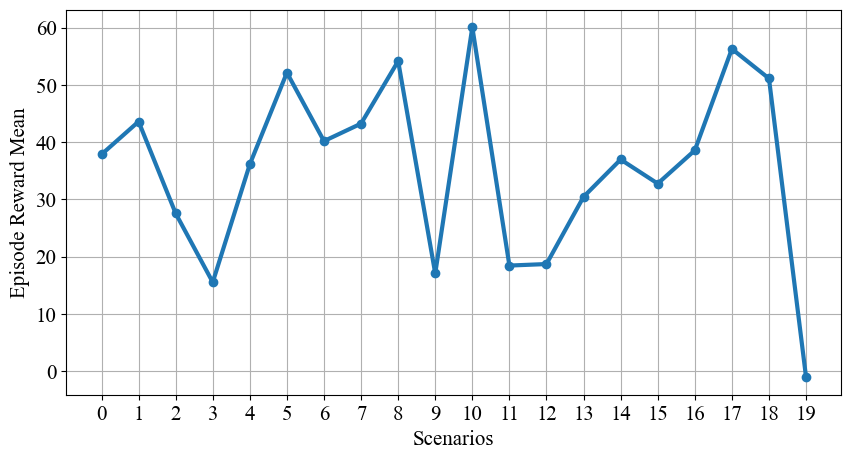

In [8]:
fig = plt.figure(figsize=(10,5))

plt.plot(np.array(reward_list), linewidth = 3, marker='o')
plt.grid()
plt.xlabel("Scenarios", fontsize=15)
plt.ylabel("Episode Reward Mean", fontsize=15)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xticks(range(0, 20, 1), [str(int(c)) for c in range(0, 20, 1)])
plt.show()

In [9]:
# save control result

current_dir = os.getcwd()

save_dir = current_dir + "/trained_model_evaluation_results"

controller_tester.save_control_result(save_dir)

Plot the last scenario tested.
Episodic reward (Total): -1.029978.


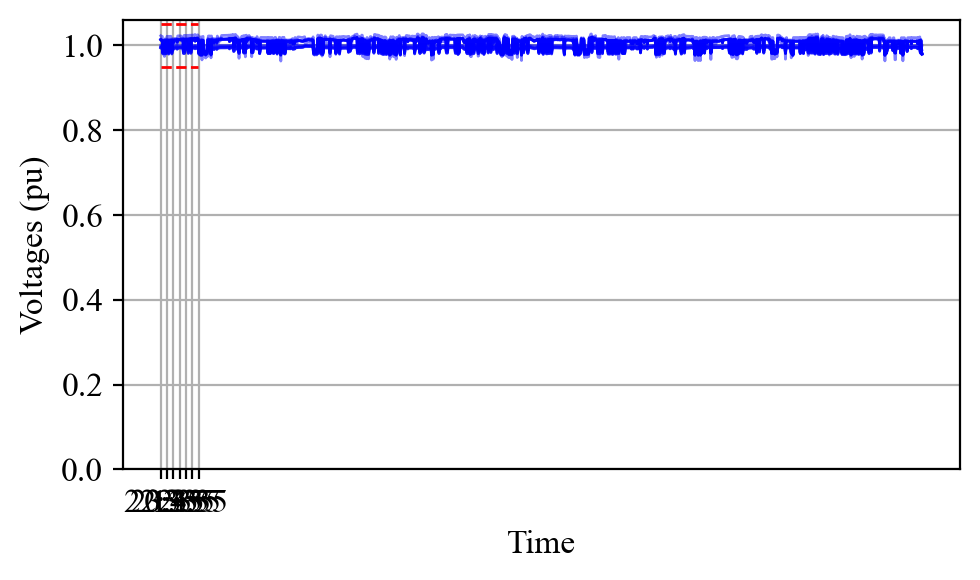

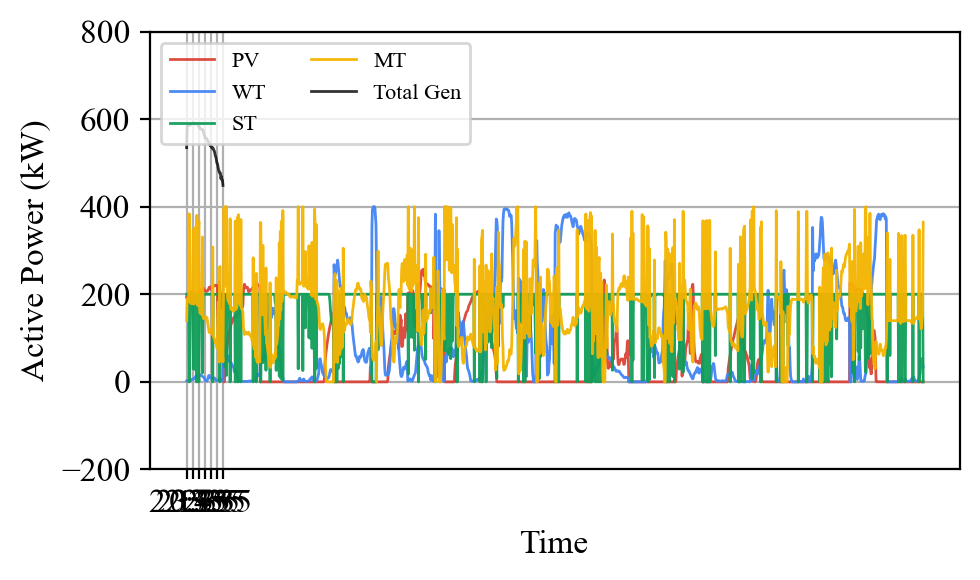

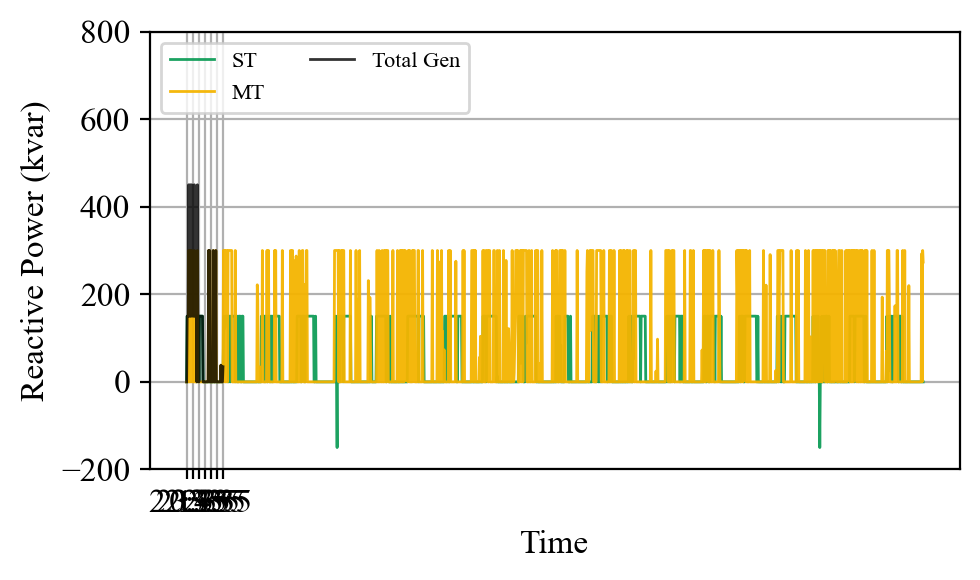

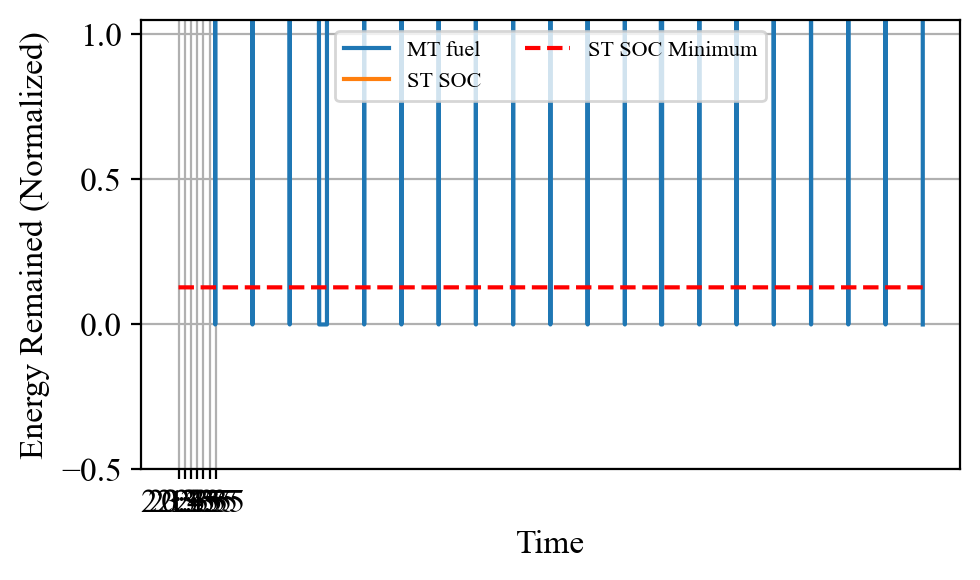

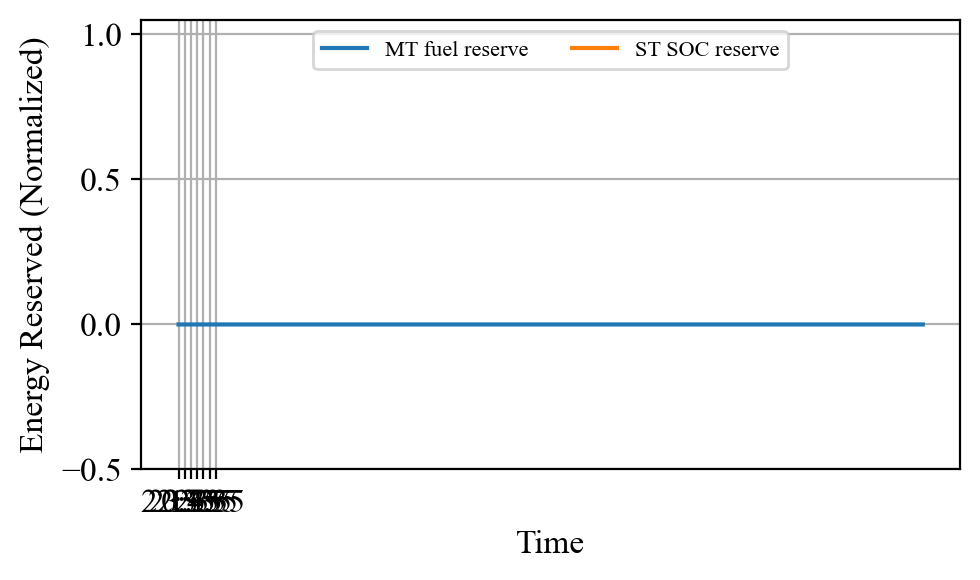

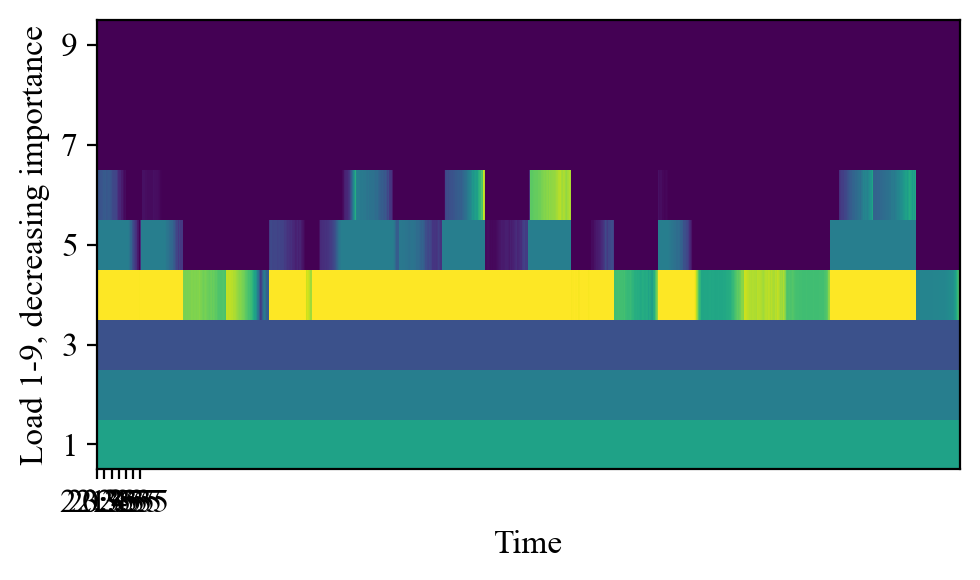

In [10]:
print("Plot the last scenario tested.")
controller_tester.plot_control_result()

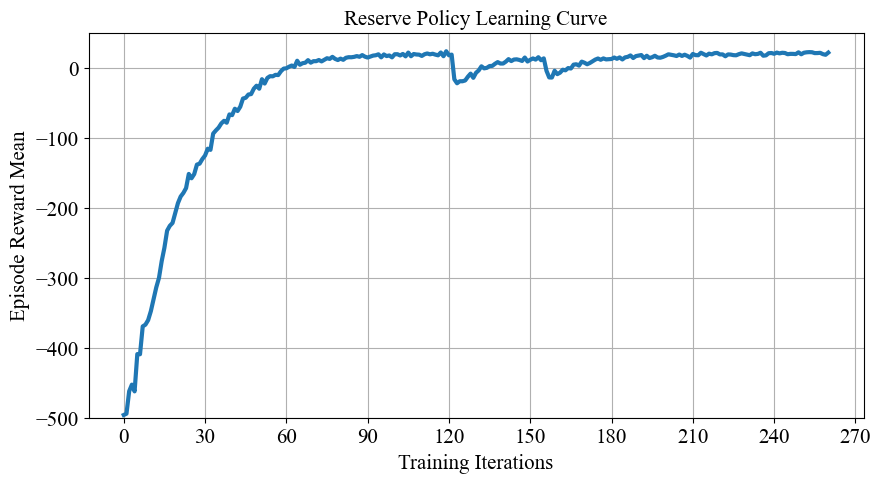

In [11]:
progress = os.path.join(current_file_path,
                'results_hpc/with_wind_and_pv_Q/ReservePolicyEnv-v0/PPO_ReservePolicyEnv-v0_e88cf_00000_0_2021-10-20_19-55-03/progress.csv')

progress_df = pd.read_csv(progress)

episode_reward_mean = progress_df['episode_reward_mean']

fig = plt.figure(figsize=(10,5))
plt.plot(episode_reward_mean, linewidth = 3)

plt.xticks(range(0, 271, 30), [str(int(c/1)) for c in range(0, 271, 30)], fontsize=15) 

plt.ylim((-500,50))
plt.yticks(fontsize=15)

plt.xlabel("Training Iterations", fontsize=15)
plt.ylabel("Episode Reward Mean", fontsize=15)
plt.title("Reserve Policy Learning Curve", fontsize=15)
plt.grid()
plt.show()

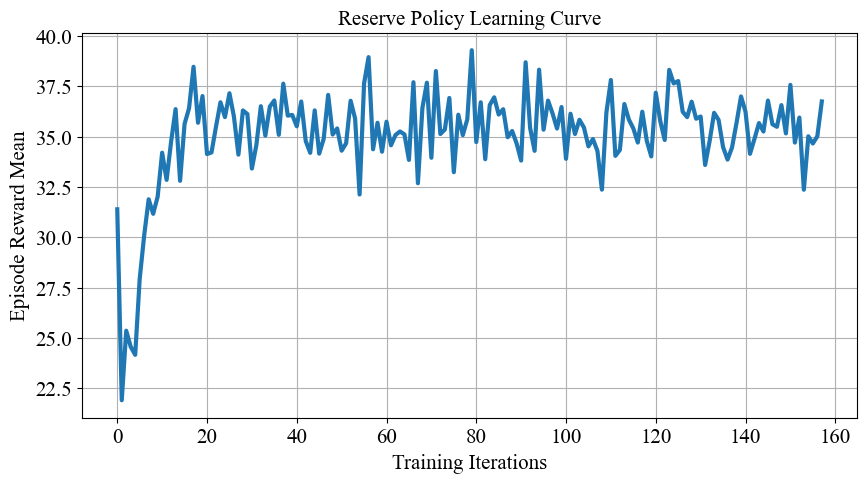

In [12]:
progress2 = os.path.join(current_file_path,
                'results_hpc/states_including_end_horizon_reserves_updated_action_mapping4/ReservePolicyEnv-v4/PPO_ReservePolicyEnv-v4_a1a96_00000_0_2021-10-24_22-47-17/progress.csv')

progress_df2 = pd.read_csv(progress2)

episode_reward_mean2 = progress_df2['episode_reward_mean']

fig = plt.figure(figsize=(10,5))
plt.plot(episode_reward_mean2, linewidth = 3)

plt.xticks(fontsize=15) 

#plt.ylim((-500,50))
plt.yticks(fontsize=15)

plt.xlabel("Training Iterations", fontsize=15)
plt.ylabel("Episode Reward Mean", fontsize=15)
plt.title("Reserve Policy Learning Curve", fontsize=15)
plt.grid()
plt.show()

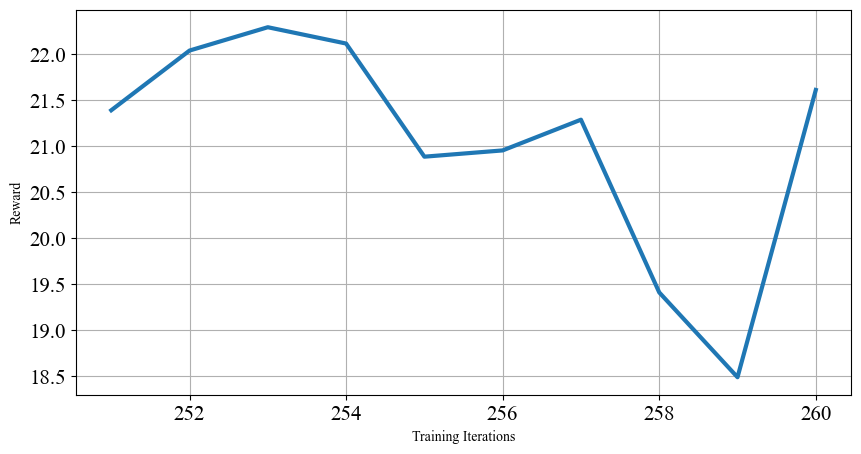

In [13]:
fig = plt.figure(figsize=(10,5))
plt.plot(episode_reward_mean[-10:], linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Training Iterations")
plt.ylabel("Reward")
plt.grid()
plt.show()

In [14]:
## Plots

In [15]:
Zbase = 1
Vbase = 4160
Sbase = (Vbase**2)/Zbase
w_to_kw_conv = 1000

num_time_steps = 72

In [16]:
log_dir = current_file_path + '/trained_model_evaluation_results'
log_dir

'/Users/aeseye/Desktop/AGM-Resilience-Project/Github/rl_mpc_reserve_policy/rl_learning/trained_model_evaluation_results'

In [17]:
wt_active_power = pd.read_csv(log_dir + '/wt_power_results.csv')
wt_p = wt_active_power.to_numpy()

pv_active_power = pd.read_csv(log_dir + '/pv_power_results.csv')
pv_p = pv_active_power.to_numpy()

mt_active_power = pd.read_csv(log_dir + '/mt_power_p_results.csv')
mt_p = mt_active_power.to_numpy()

st_active_power = pd.read_csv(log_dir + '/st_power_p_results.csv')
st_p = st_active_power.to_numpy()

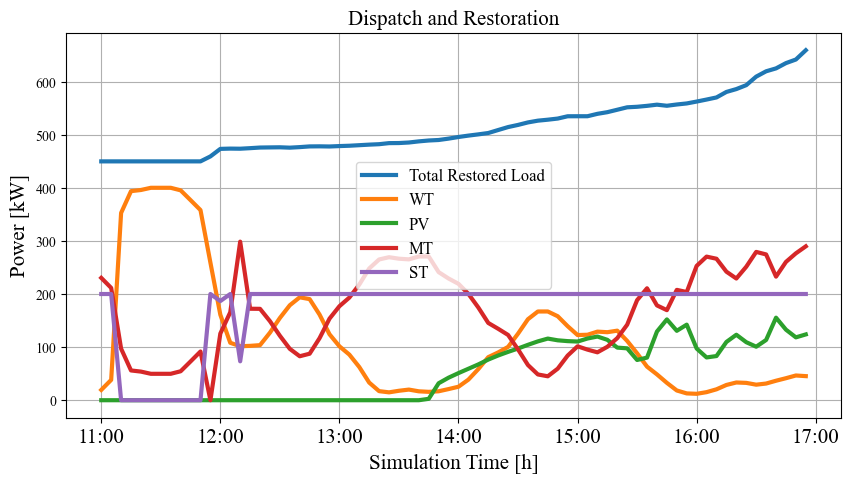

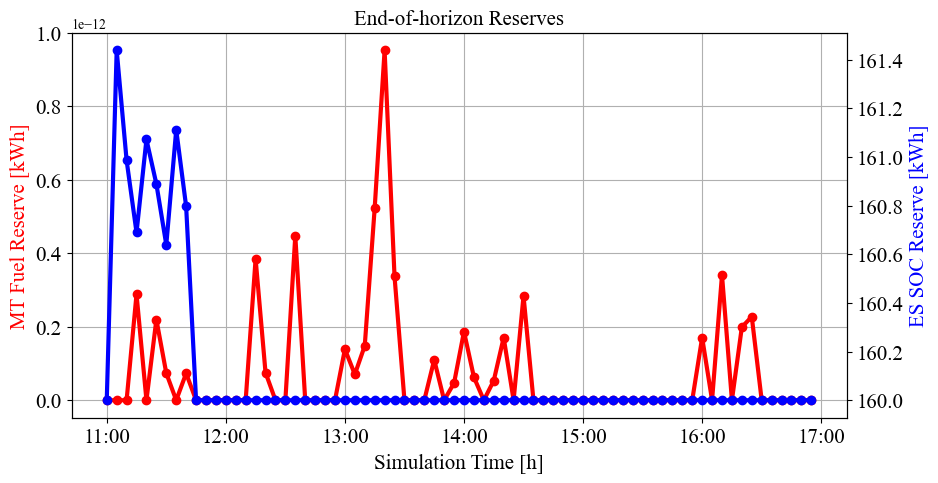

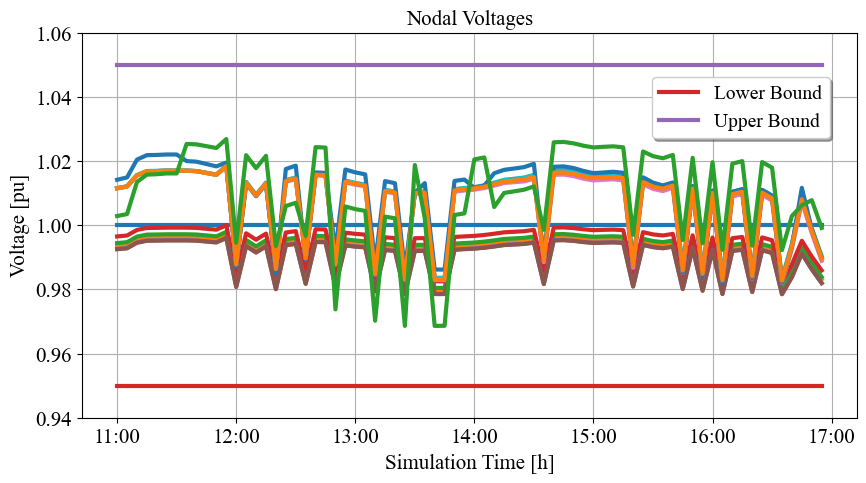

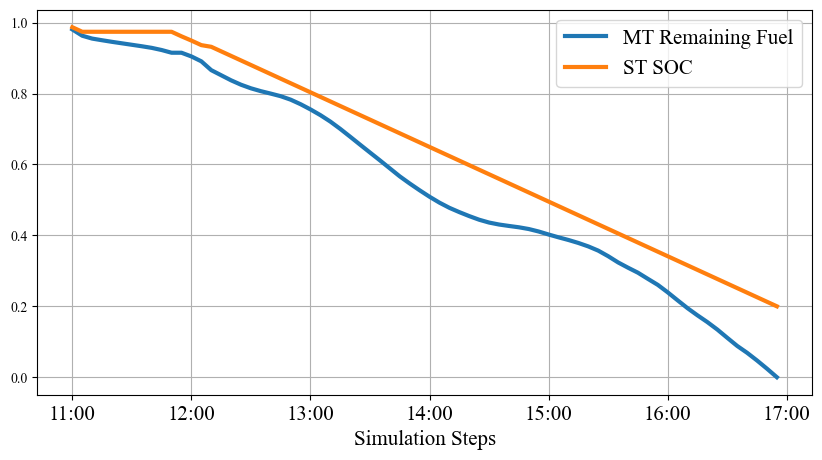

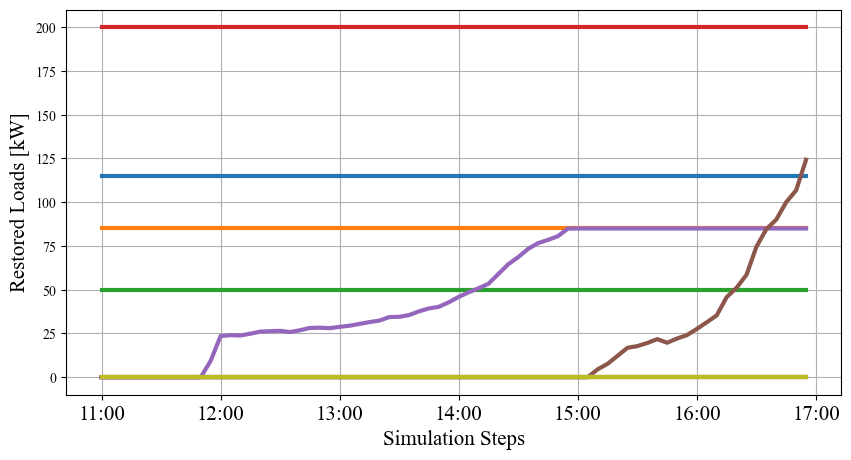

In [40]:
## Plots 

s_id = 5

active_restored_load = pd.read_csv(log_dir + '/active_load_results.csv')
load_p = active_restored_load.to_numpy()
load_p = load_p.transpose()
load_p_scenario = load_p[:,s_id*num_time_steps:(s_id+1)*num_time_steps]

# Restored load at each time step

P_restored_t = ([])
for jdx in range(72):
    P_restored_t = np.append(P_restored_t, sum(load_p_scenario[:,jdx]))

wt_p_scenario = wt_p[s_id*num_time_steps:(s_id+1)*num_time_steps]
pv_p_scenario = pv_p[s_id*num_time_steps:(s_id+1)*num_time_steps]
mt_p_scenario = mt_p[s_id*num_time_steps:(s_id+1)*num_time_steps]
st_p_scenario = st_p[s_id*num_time_steps:(s_id+1)*num_time_steps]

#net_load = np.array([1200] * num_time_steps) - (wt_p_scenario+pv_p_scenario)

# Reserve outputs

mt_fuel_reserve = pd.read_csv(log_dir + '/mt_fuel_reserve_results.csv')
fuel_reserve = mt_fuel_reserve.to_numpy()

st_soc_reserve = pd.read_csv(log_dir + '/st_soc_reserve_results.csv')
soc_reserve = st_soc_reserve.to_numpy()

# Nodal voltage outputs

voltages = pd.read_csv(log_dir + '/voltage_results.csv')
volts = voltages.to_numpy().transpose()

fig = plt.figure(figsize=(10,5))
plt.plot(P_restored_t, label='Total Restored Load', linewidth = 3)
plt.plot(wt_p_scenario, label='WT', linewidth = 3)
plt.plot(pv_p_scenario, label='PV', linewidth = 3)
plt.plot(mt_p_scenario, label='MT', linewidth = 3)
plt.plot(st_p_scenario, label='ST', linewidth = 3)
#plt.plot(net_load[:,0], label='Net Load', linewidth = 3)
plt.xticks(range(0, 73, 12), [str(int(c/12)) + ":00" for c in range(11*12, 11*19, 12)], fontsize=15)
#plt.yticks(range(0, 901, 100), [str(int(c)) for c in range(0, 901, 100)], fontsize=15)
plt.xlabel("Simulation Time [h]", fontsize=15)
plt.ylabel("Power [kW]", fontsize=15)
plt.title("Dispatch and Restoration", fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

t = range(0,num_time_steps)
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(t, fuel_reserve[s_id*num_time_steps:(s_id+1)*num_time_steps], color="red", marker="o", linewidth = 3)
ax.set_xlabel("Simulation Time [h]",fontsize=15)
ax.set_ylabel("MT Fuel Reserve [kWh]",color="red",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
#ax.set_ylim((-5,210))
ax.grid()

ax2=ax.twinx()
ax2.plot(t, soc_reserve[s_id*num_time_steps:(s_id+1)*num_time_steps]*800/100,color="blue",marker="o", linewidth = 3)
ax2.set_ylabel("ES SOC Reserve [kWh]",color="blue",fontsize=15)
#ax2.set_ylim((140,220))
plt.title("End-of-horizon Reserves", fontsize=15)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
plt.xticks(range(0, 73, 12), [str(int(c/12)) + ":00" for c in range(11*12, 11*19, 12)])
plt.show()


volts_scenario = volts[:,s_id*num_time_steps:(s_id+1)*num_time_steps]
lb = [0.95]*72
ub = [1.05]*72

fig = plt.figure(figsize=(10,5))
for s in range(len(volts_scenario)):
    plt.plot(volts_scenario[s], linewidth = 3)
plt.plot(lb, linewidth = 3, label='Lower Bound')
plt.plot(ub, linewidth = 3, label='Upper Bound')
plt.xticks(range(0, 73, 12), [str(int(c/12)) + ":00" for c in range(11*12, 11*19, 12)], fontsize=15)
plt.xlabel("Simulation Time [h]", fontsize=15)
plt.ylabel("Voltage [pu]", fontsize=15)
plt.title("Nodal Voltages", fontsize=15)
plt.ylim((0.94, 1.06))
plt.yticks(fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.85, 0.91), fancybox=True, shadow=True, ncol=1, fontsize=14)
plt.grid()
plt.show()

mt_remaining_fuel = pd.read_csv(log_dir + '/mt_remaining_fuel_results.csv')
mt_fuel_remain = mt_remaining_fuel.to_numpy()
st_soc = pd.read_csv(log_dir + '/st_soc_results.csv')
soc = st_soc.to_numpy()


fig = plt.figure(figsize=(10,5))
plt.plot(mt_fuel_remain[s_id*num_time_steps:(s_id+1)*num_time_steps]/1000, label='MT Remaining Fuel', linewidth = 3)
plt.plot(soc[s_id*num_time_steps:(s_id+1)*num_time_steps]/100, label='ST SOC', linewidth = 3)
plt.xlabel("Simulation Steps", fontsize=15)
plt.xticks(range(0, 73, 12), [str(int(c/12)) + ":00" for c in range(11*12, 11*19, 12)], fontsize=15)
plt.xticks(fontsize=15)
#plt.ylabel("%")
plt.legend(fontsize=15)
plt.grid()
plt.show()


fig = plt.figure(figsize=(10,5))
for s in range(len(load_p_scenario)):
    plt.plot(load_p_scenario[s], linewidth = 3)
plt.xticks(range(0, 73, 12), [str(int(c/12)) + ":00" for c in range(11*12, 11*19, 12)], fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Simulation Steps", fontsize=15)
plt.ylabel("Restored Loads [kW]", fontsize=15)
plt.grid()
plt.show()

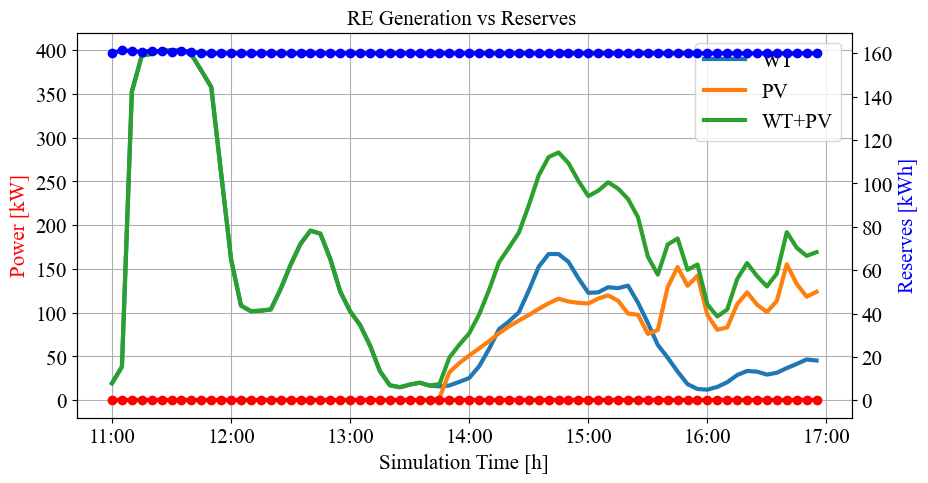

In [36]:
t = range(0,num_time_steps)
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(t, wt_p_scenario, label='WT', linewidth = 3)
ax.plot(t, pv_p_scenario, label='PV', linewidth = 3)
ax.plot(t, wt_p_scenario+pv_p_scenario, label='WT+PV', linewidth = 3)
ax.set_xlabel("Simulation Time [h]",fontsize=15)
ax.set_ylabel("Power [kW]",color="red",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
#ax.set_ylim((-5,210))
ax.legend(fontsize=15)
ax.grid()

ax2=ax.twinx()
ax2.plot(t, soc_reserve[s_id*num_time_steps:(s_id+1)*num_time_steps]*800/100,color="blue",marker="o", linewidth = 3, label='SOC Reserve')
ax2.plot(t, fuel_reserve[s_id*num_time_steps:(s_id+1)*num_time_steps], color="red", marker="o", linewidth = 3, label='Fuel Reserve')
ax2.set_ylabel("Reserves [kWh]",color="blue",fontsize=15)
#ax2.set_ylim((140,220))
plt.title("RE Generation vs Reserves ", fontsize=15)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
#ax2.legend(fontsize=15)
plt.xticks(range(0, 73, 12), [str(int(c/12)) + ":00" for c in range(11*12, 11*19, 12)])
plt.show()

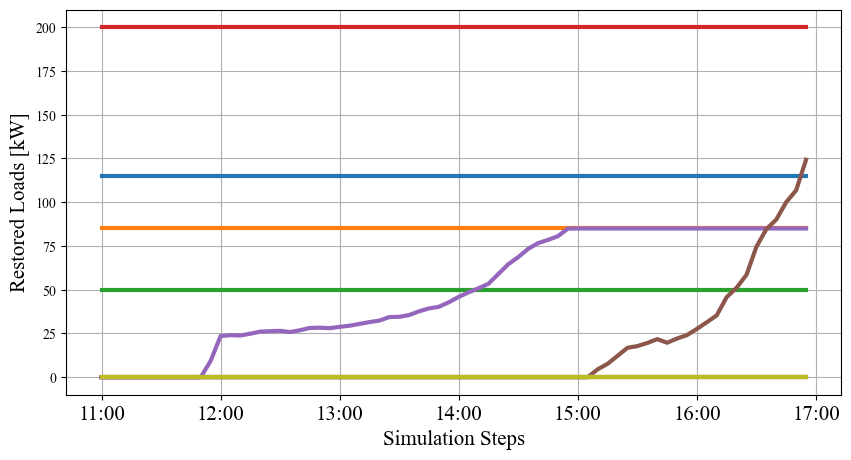

In [38]:
s_id = 5

active_restored_load = pd.read_csv(log_dir + '/active_load_results.csv')
load_p = active_restored_load.to_numpy()
load_p = load_p.transpose()
load_p_scenario = load_p[:,s_id*num_time_steps:(s_id+1)*num_time_steps]

fig = plt.figure(figsize=(10,5))
for s in range(len(load_p_scenario)):
    plt.plot(load_p_scenario[s], linewidth = 3)
plt.xticks(range(0, 73, 12), [str(int(c/12)) + ":00" for c in range(11*12, 11*19, 12)], fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Simulation Steps", fontsize=15)
plt.ylabel("Restored Loads [kW]", fontsize=15)
plt.grid()
plt.show()